In [1]:
import pandas as pd
import numpy as np

# Income

In [2]:
data = pd.read_csv('adult.csv')
data.shape

(32561, 15)

In [3]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


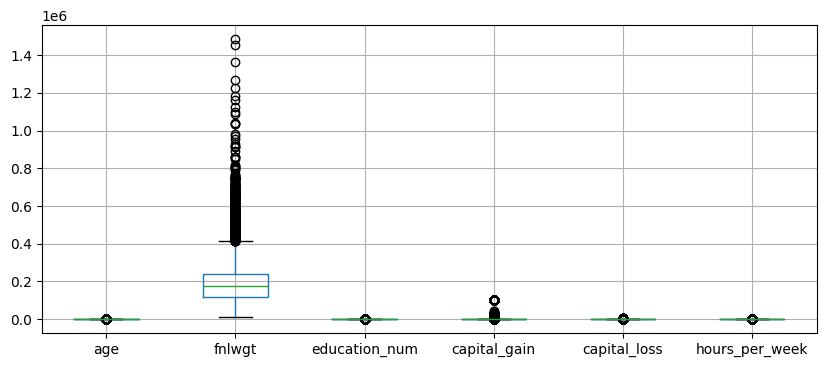

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

x = data.boxplot()
plt.show()



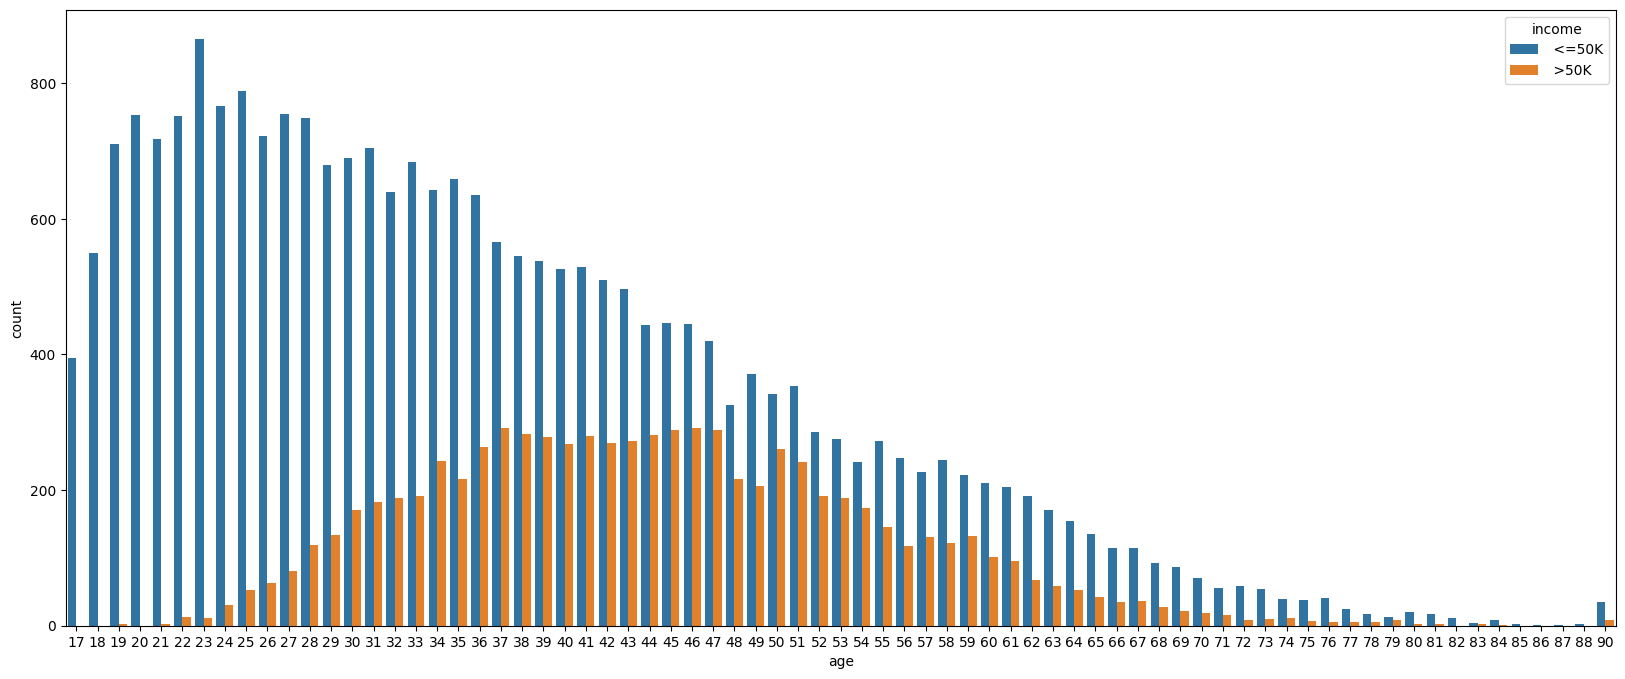

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
x = sns.countplot(data=data, x='age', hue='income');
plt.show()


In [8]:
list_of_categorical = data.dtypes.where(data.dtypes == 'object').dropna().index.tolist()
list_of_categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [9]:
list_of_numerical = data.dtypes.where(data.dtypes != 'object').dropna().index.tolist()
list_of_numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [10]:
for c in list_of_categorical:
    print(data[c].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [13]:
from sklearn.preprocessing import LabelEncoder
for c in list_of_categorical:
    le = LabelEncoder()
    le.fit(data[c])
    data[c] = le.transform(data[c])

In [14]:
list_of_categorical = data.dtypes.where(data.dtypes == 'object').dropna().index.tolist()
list_of_categorical

[]

In [15]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [16]:
data.dtypes

age               int64
workclass         int64
fnlwgt            int64
education         int64
education_num     int64
marital_status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int64
income            int64
dtype: object

In [18]:
X = data.drop('income', axis=1)
y = data.income

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [25]:
gnb.score(X_test, y_test)

0.7937352850854744

In [27]:
pred_df = X_test.copy()
pred_df['Act'] = y_test
pred_df['Pred'] = gnb.predict(X_test) 

In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred_df['Act'], pred_df['Pred']))

[[7029  402]
 [1613  725]]


# Sentiment

In [29]:
! python -m textblob.download_corpora

[nltk_data] Downloading package brown to /home/arunav/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /home/arunav/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/arunav/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/arunav/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /home/arunav/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/arunav/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [30]:
from textblob.classifiers import NaiveBayesClassifier

In [31]:
train = [
    ('i love this sandwich', 'pos'),
    ('this is an amazing place', 'pos'),
    ('i feel very good about this drink', 'pos'),
    ('what an awesome view', 'pos'),
    ('i did not like this restaurant', 'neg'),
    ('i am tired of this work', 'neg'),
    ('he is my sworn enemy', 'neg'),
    ('my boss is horrible', 'neg'),
    ('i hate my neighbour', 'neg')
]

In [32]:
train

[('i love this sandwich', 'pos'),
 ('this is an amazing place', 'pos'),
 ('i feel very good about this drink', 'pos'),
 ('what an awesome view', 'pos'),
 ('i did not like this restaurant', 'neg'),
 ('i am tired of this work', 'neg'),
 ('he is my sworn enemy', 'neg'),
 ('my boss is horrible', 'neg'),
 ('i hate my neighbour', 'neg')]

In [34]:
cl = NaiveBayesClassifier(train)

In [35]:
cl.classify('This is an amazing library')
prob_dist = cl.prob_classify('This is an amazing library')
prob_dist.max()

'pos'

In [36]:
round(prob_dist.prob("pos"), 2)

0.93

In [37]:
round(prob_dist.prob("neg"), 2)

0.07

In [38]:
cl.classify('I did not like this place')

'neg'

In [39]:
cl.classify('I hate this')

'neg'

In [41]:
cl.prob_classify('This is an amazing library').max()

'pos'